# Python Placement Assignment Answers

## Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following questions

Note -

1. Write code comments wherever required for code understanding

Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD

Insights to be drawn -
- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
- Get all TESLA cars with the model year, and model type made in Bothell City.
- Get all the cars that have an electric range of more than 100, and were made after
2015
- Draw plots to show the distribution between city and electric vehicle type


In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("Python_Question_9_Dataset.csv")

In [3]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
Noteligible = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == 'Not eligible due to low battery range']
Noteligible.loc[:,["Make","Clean Alternative Fuel Vehicle (CAFV) Eligibility"]]

,Make,Clean Alternative Fuel Vehicle (CAFV) Eligibility
6,FORD,Not eligible due to low battery range
7,AUDI,Not eligible due to low battery range
8,FORD,Not eligible due to low battery range
14,FORD,Not eligible due to low battery range
15,KIA,Not eligible due to low battery range
...,...,...
130377,BMW,Not eligible due to low battery range
130385,AUDI,Not eligible due to low battery range
130390,JEEP,Not eligible due to low battery range
130407,TOYOTA,Not eligible due to low battery range


In [4]:
# Get all TESLA cars with the model year, and model type made in Bothell City
city = data[(data["Make"] == "TESLA") &(data["Model Year"]) & (data["Electric Vehicle Type"])&(data["City"] == "Bothell")] 
city.loc[:,["City","Model Year","Make","Electric Vehicle Type"]]

,City,Model Year,Make,Electric Vehicle Type
292,Bothell,2017,TESLA,Battery Electric Vehicle (BEV)
495,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
503,Bothell,2023,TESLA,Battery Electric Vehicle (BEV)
579,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
776,Bothell,2023,TESLA,Battery Electric Vehicle (BEV)
...,...,...,...,...
129392,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
129508,Bothell,2021,TESLA,Battery Electric Vehicle (BEV)
129665,Bothell,2013,TESLA,Battery Electric Vehicle (BEV)
129778,Bothell,2019,TESLA,Battery Electric Vehicle (BEV)


In [5]:
# Get all the cars that have an electric range of more than 100, and were made after2015
el = data[(data["Electric Range"] > 100)& (data["Model Year"] > 2015)]
el.loc[:,["Make","Electric Range","Model Year"]]

,Make,Electric Range,Model Year
0,TESLA,238,2018
2,TESLA,220,2019
4,TESLA,210,2017
12,TESLA,308,2020
13,TESLA,322,2020
...,...,...,...
130417,TESLA,291,2020
130428,NISSAN,151,2018
130432,TESLA,291,2020
130436,TESLA,215,2018


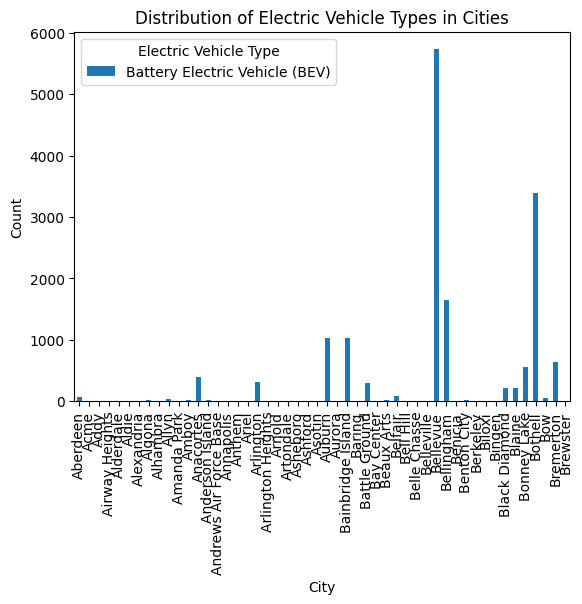

In [8]:
# Draw plots to show the distribution between city and electric vehicle type
ElectricVehicle = data[data["Electric Vehicle Type"] == "Battery Electric Vehicle (BEV)"]
elv =  ElectricVehicle.loc[:,["City","Electric Vehicle Type"]]
import matplotlib.pyplot as plt

# Group the data by City and Electric Vehicle Type and count the occurrences
counts = elv.groupby(['City', 'Electric Vehicle Type']).size().unstack()[:50]

# Create a bar plot
counts.plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types in Cities')
plt.legend(title='Electric Vehicle Type')
plt.show()

In [7]:
import re

def count_pos_tags(text):
    # Count verbs
    verbs = re.findall(r'\b\w+ing\b|\b\w+ed\b|\b\w+s\b', text)
    verb_count = len(verbs)
    
    # Count nouns
    nouns = re.findall(r'\b\w+s\b|\b\w+[^inged]s\b|\b\w+[^ing]ing\b|\b\w+ed\b', text)
    noun_count = len(nouns)
    
    # Count pronouns
    pronouns = re.findall(r'\b(?:he|she|it|they|we|you|I|me|him|her|us|them)\b', text, re.IGNORECASE)
    pronoun_count = len(pronouns)
    
    # Count adjectives
    adjectives = re.findall(r'\b\w+ful\b|\b\w+ous\b|\b\w+ish\b|\b\w+ive\b', text)
    adjective_count = len(adjectives)
    
    # Create a dictionary with the counts
    pos_counts = {
        'Verbs': verb_count,
        'Nouns': noun_count,
        'Pronouns': pronoun_count,
        'Adjectives': adjective_count
    }
    
    return pos_counts

# Test case 1: Counting POS tags in a phrase
phrase = "The quick brown fox jumps over the lazy dog"
result1 = count_pos_tags(phrase)
print(result1)

# Test case 2: Counting POS tags in a paragraph
paragraph = "The cat is sleeping on the mat. It looks very comfortable. The mat is soft and fluffy."
result2 = count_pos_tags(paragraph)
print(result2)


{'Verbs': 1, 'Nouns': 1, 'Pronouns': 0, 'Adjectives': 0}
{'Verbs': 4, 'Nouns': 4, 'Pronouns': 1, 'Adjectives': 0}
